## Understanding Data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.shape

(1338, 7)

In [6]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.describe(include='O')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [9]:
list(df.region.unique())

['southwest', 'southeast', 'northwest', 'northeast']

## Data Cleaning

In [10]:
#missing value
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
#Duplicated Value
df[df.duplicated(keep = 'first')]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [12]:
df[df["bmi"] == 30.59]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.56310
423,25,male,30.59,0,no,northeast,2727.39510
526,19,female,30.59,2,no,northwest,24059.68019
567,41,male,30.59,2,no,northwest,7256.72310
581,19,male,30.59,0,no,northwest,1639.56310
983,27,female,30.59,1,no,northeast,16796.41194
1158,20,female,30.59,0,no,northeast,2459.72010


In [13]:
df.drop_duplicates(keep = 'first', inplace = True)

In [14]:
df[df["bmi"] == 30.59]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.56310
423,25,male,30.59,0,no,northeast,2727.39510
526,19,female,30.59,2,no,northwest,24059.68019
567,41,male,30.59,2,no,northwest,7256.72310
983,27,female,30.59,1,no,northeast,16796.41194
1158,20,female,30.59,0,no,northeast,2459.72010


## Data Visualization

### Univariate Analysis


<Figure size 1000x600 with 0 Axes>

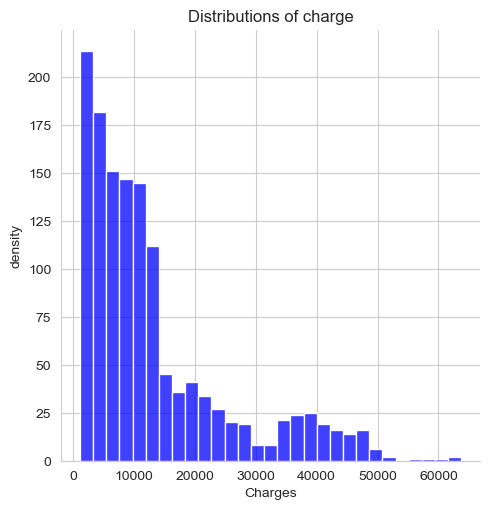

In [15]:
plt.figure(figsize = (10,6))
sns.displot(df.charges, color = 'b')
plt.title("Distributions of charge")
plt.xlabel('Charges', size = 10)
plt.ylabel('density', size = 10)
plt.show()

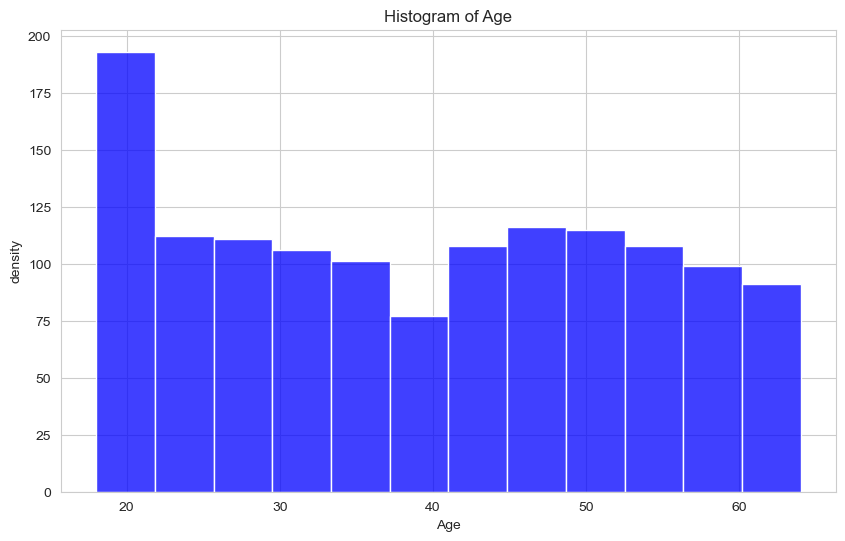

In [16]:
plt.figure(figsize = (10,6))
sns.histplot(df.age, color = 'b')
plt.title("Histogram of Age")
plt.xlabel('Age', size = 10)
plt.ylabel('density', size = 10)
plt.show()

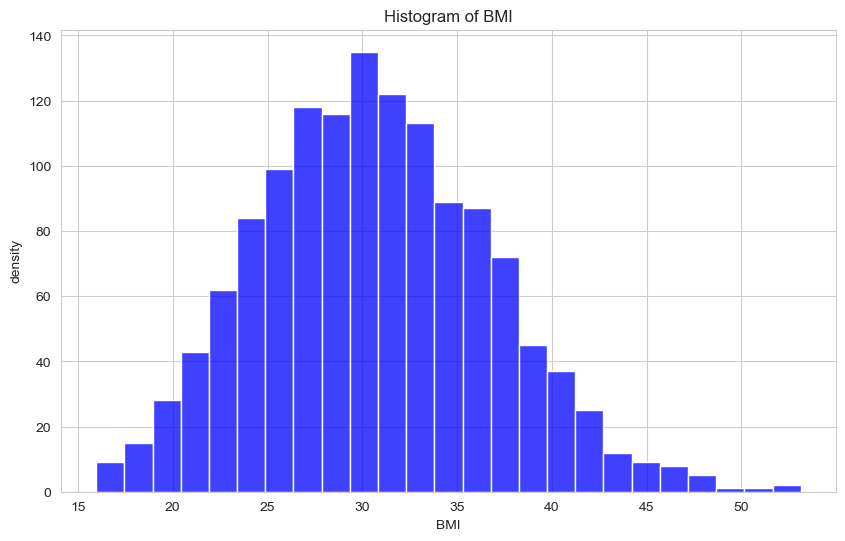

In [17]:
plt.figure(figsize = (10,6))
sns.histplot(df.bmi, color = 'b')
plt.title("Histogram of BMI")
plt.xlabel('BMI', size = 10)
plt.ylabel('density', size = 10)
plt.show()

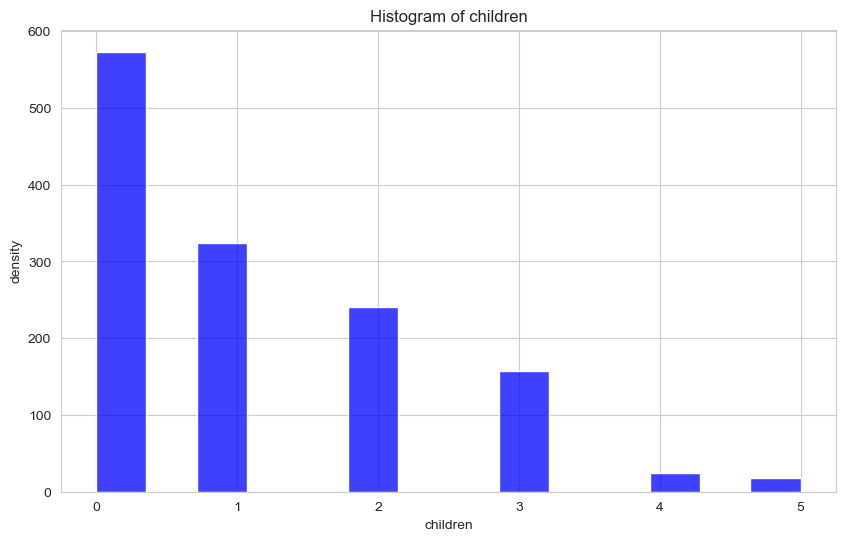

In [18]:
plt.figure(figsize = (10,6))
sns.histplot(df.children, color = 'b')
plt.title("Histogram of children")
plt.xlabel('children', size = 10)
plt.ylabel('density', size = 10)
plt.show()

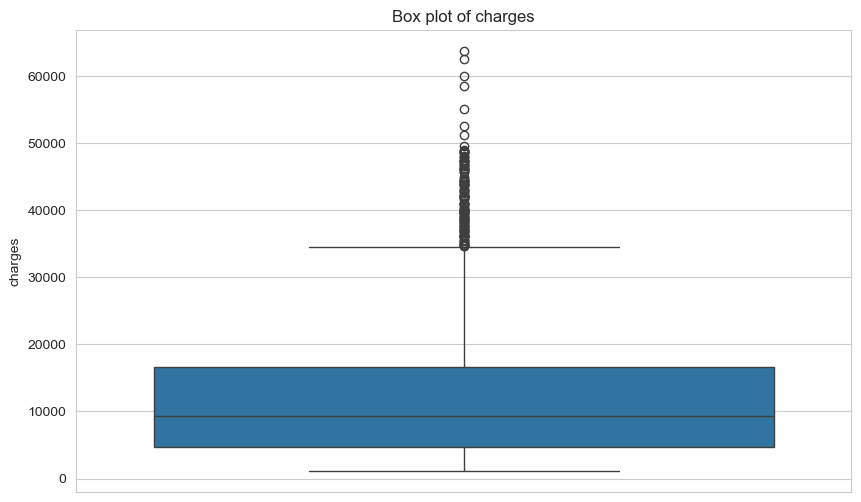

In [19]:
plt.figure(figsize = (10,6))
sns.boxplot(df.charges)
plt.title('Box plot of charges')
plt.show()

In [20]:
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1
print(f'Q1 = {Q1}')
print(f'Q3 = {Q3}')
print(f'IQR = {IQR}')


Q1 = 4746.344
Q3 = 16657.71745
IQR = 11911.37345


In [21]:
#outlinear of boxplot
df[(df['charges'] < Q1 - 1.5 * IQR) | (df['charges'] > Q3 + 1.5*IQR)]

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


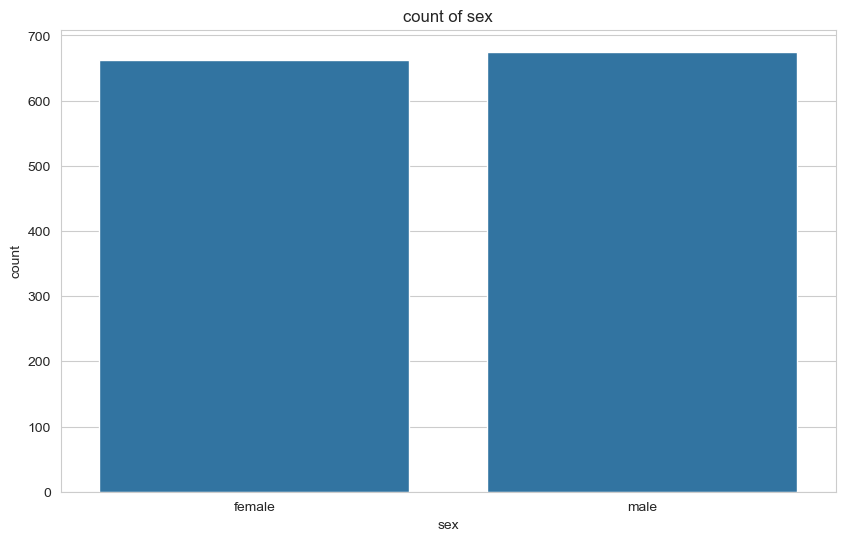

In [22]:
#countplot for count string
plt.figure(figsize = (10,6))
sns.countplot(x = 'sex', data =df)
plt.title('count of sex')
plt.xlabel('sex')
plt.show()

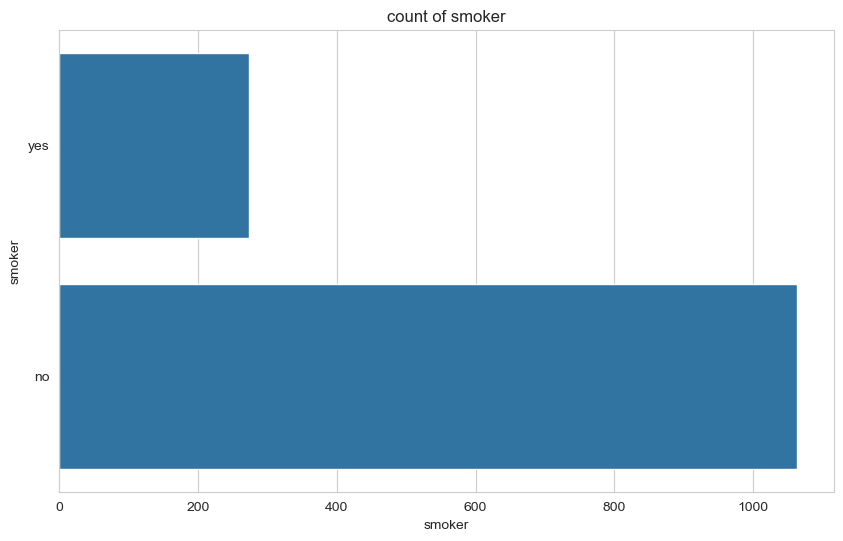

In [23]:
#countplot for count string

plt.figure(figsize = (10,6))
sns.countplot(df.smoker)
plt.title('count of smoker')
plt.xlabel('smoker')
plt.show()

In [24]:
df.smoker.value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

In [25]:
df.children.value_counts()

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

C:\Users\kongp\AppData\Local\Temp\ipykernel_27752\1755822883.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df.region, palette = "rocket")


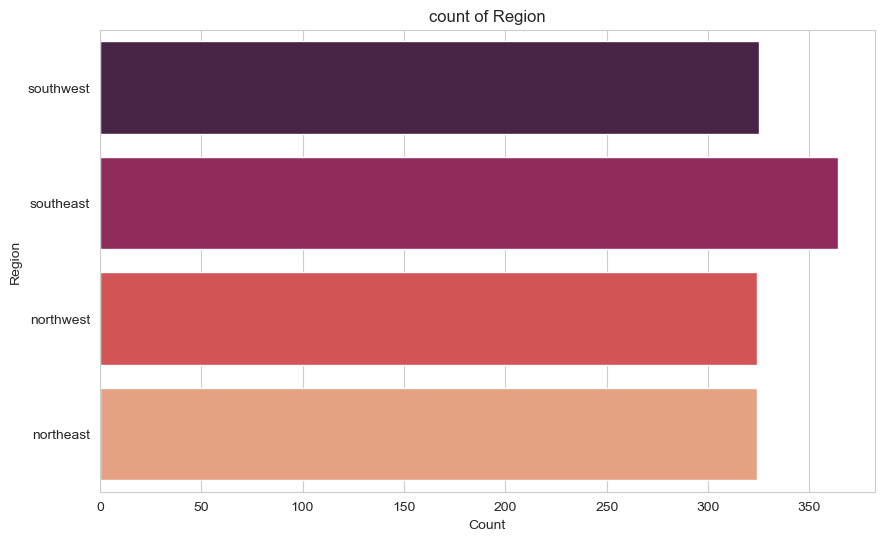

In [26]:
#countplot for count string
plt.figure(figsize = (10,6))
sns.countplot(df.region, palette = "rocket")
plt.title('count of Region')
plt.xlabel('Count', size = 10)
plt.ylabel('Region', size = 10 )
plt.show()

### Bivariate Analysis


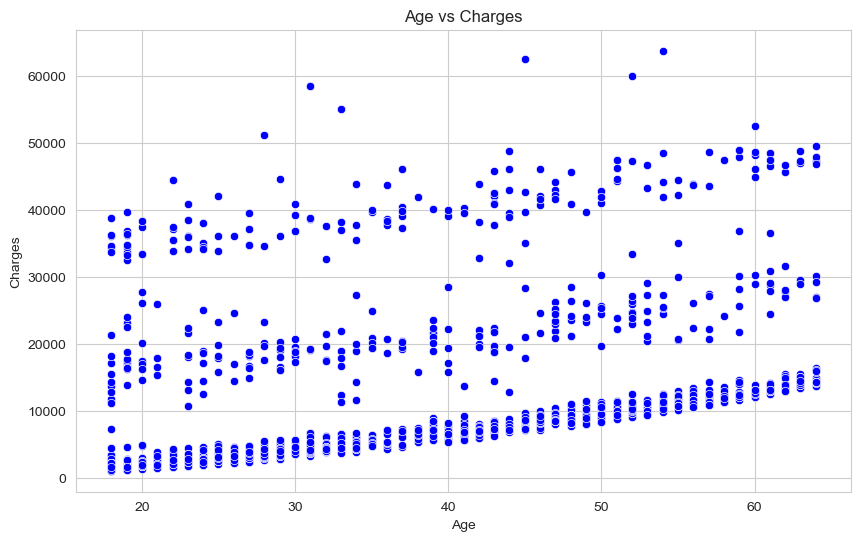

In [27]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'age', y = 'charges', color = 'b', data = df)
plt.title('Age vs Charges')
plt.xlabel('Age')
plt.ylabel("Charges")
plt.show()

In [28]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [29]:
numeric_df = df[['age', 'bmi', 'children', 'charges']]

In [30]:
numeric_df.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [31]:
#Correlation check
print("Correlation btw age and charge is : {}".format(round(df.corr()['age']['charges'],3)))#(round(x),3)decimal btw each correlations 3 digit

Correlation btw age and charge is : 0.298


C:\Users\kongp\AppData\Local\Temp\ipykernel_27752\1569665711.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print("Correlation btw age and charge is : {}".format(round(df.corr()['age']['charges'],3)))#(round(x),3)decimal btw each correlations 3 digit


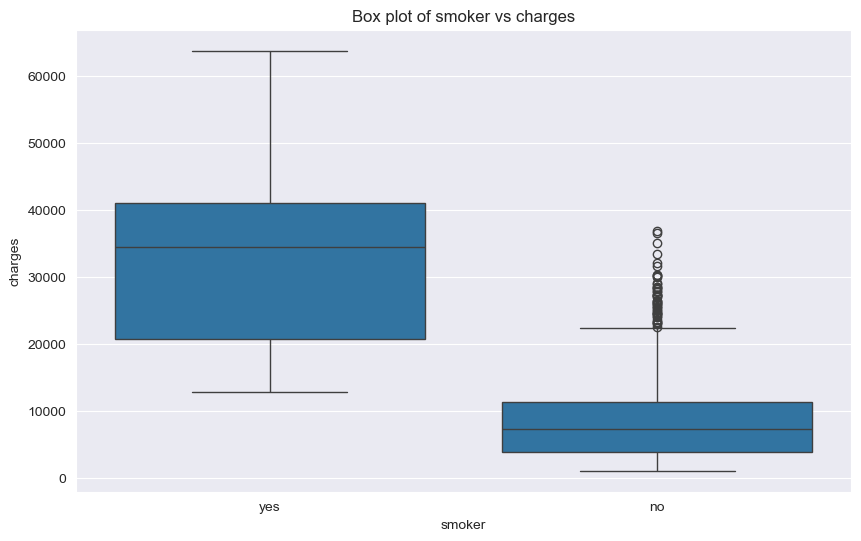

In [32]:
plt.figure(figsize = (10,6))
sns.set_style('darkgrid')
sns.boxplot(x = 'smoker', y = 'charges', data = df)
plt.title('Box plot of smoker vs charges')
plt.show()

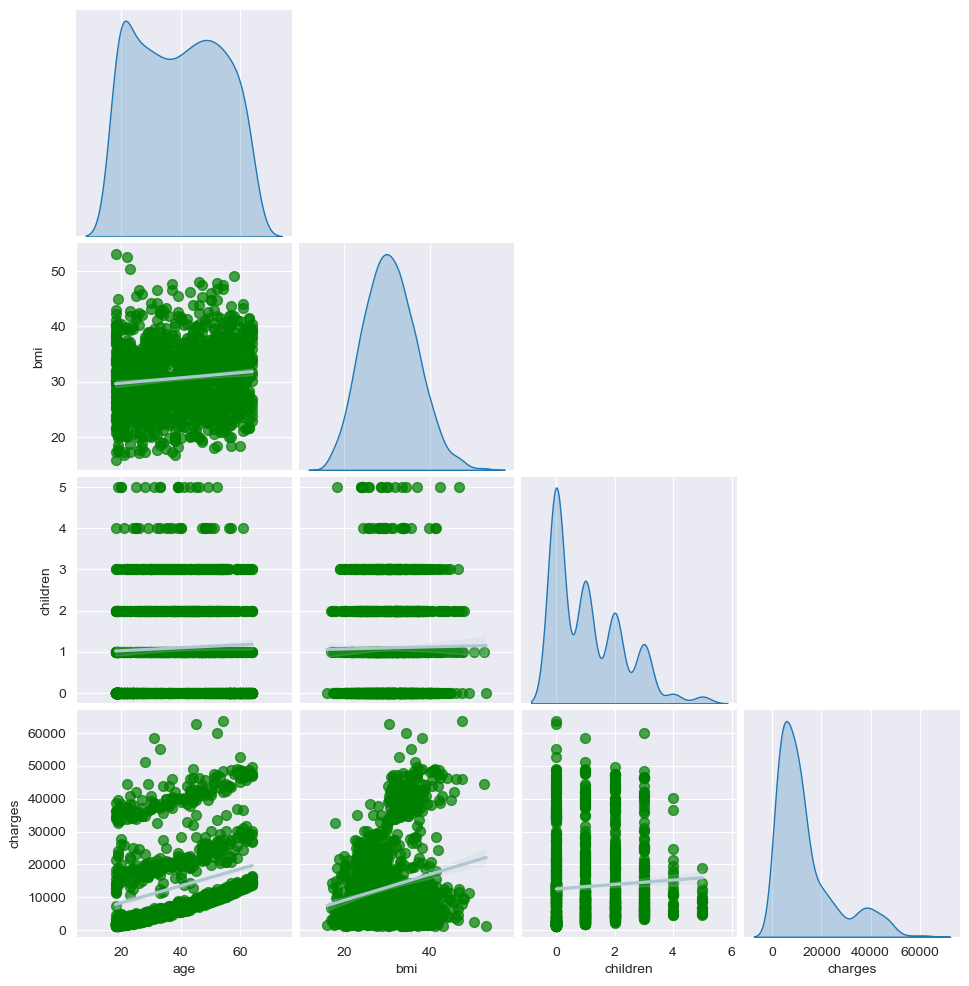

In [34]:
sns.pairplot(df,
             diag_kind="kde",
             kind='reg',
             plot_kws={'line_kws': {'color': '#aec6cf'},
                       'scatter_kws': {'alpha': 0.7, 'color': 'green', 's': 50}},  # 's' is for marker size
             corner=True)

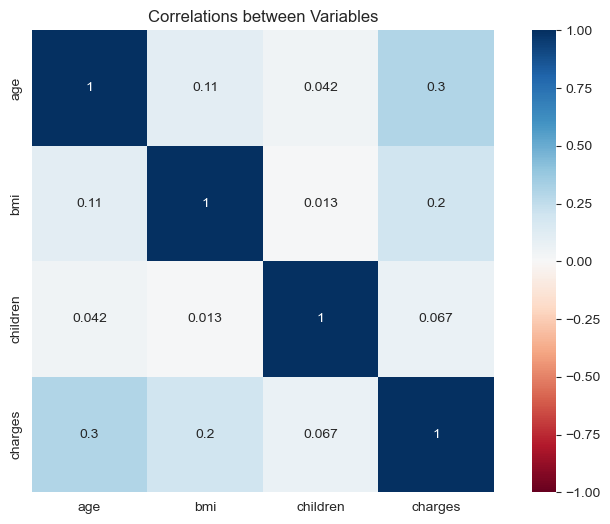

In [38]:
plt.figure(figsize = (10,6))
sns.heatmap(numeric_df.corr(), annot = True, square = True,
            cmap = 'RdBu',
            vmax = 1,
            vmin = -1)
plt.title('Correlations between Variables')
plt.show()